In [91]:
pip install matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
import os

In [9]:
with open('logs\specification.txt', 'r') as f:
    lines = f.readlines()

data = [re.findall(r'\d+', line) for line in lines]
df = pd.DataFrame(data, columns=["Unambiguity", "Understandability", "Correctness", "Verifiability"])
df = df.astype(int)
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hunat\AppData\Local\Temp\ipykernel_956\4061477662.py:1: SyntaxWarning: invalid escape sequence '\s'
  with open('logs\specification.txt', 'r') as f:


,Unambiguity,Understandability,Correctness,Verifiability
0,5,5,5,5
1,5,5,5,5
2,5,5,5,5
3,5,5,5,5
4,5,5,5,5
5,4,5,5,4
6,5,5,5,5
7,5,5,5,5
8,5,5,5,5
9,4,5,5,4


In [10]:
df.describe()

,Unambiguity,Understandability,Correctness,Verifiability
count,45.000000,45.0,45.0,45.000000
mean,4.666667,5.0,5.0,4.666667
std,0.476731,0.0,0.0,0.476731
min,4.000000,5.0,5.0,4.000000
25%,4.000000,5.0,5.0,4.000000
50%,5.000000,5.0,5.0,5.000000
75%,5.000000,5.0,5.0,5.000000
max,5.000000,5.0,5.0,5.000000


In [11]:
count = (df < 5).any(axis=1).sum()
print(count)

15


In [14]:
df.to_csv('logs\specification_eval.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hunat\AppData\Local\Temp\ipykernel_956\4037218730.py:1: SyntaxWarning: invalid escape sequence '\s'
  df.to_csv('logs\specification_eval.csv', index=False)


In [18]:
generation_path = 'logs\\generation'
generation_logs = os.listdir(generation_path)
print(generation_logs)

['.ipynb_checkpoints', 'Apple_relocate.txt', 'Apple___init__.txt', 'Game_end_game.txt', 'Game_exit_game.txt', 'Game_start_game.txt', 'Game___init__.txt', 'Snake_change_direction.txt', 'Snake_check_collision.txt', 'Snake_grow.txt', 'Snake_move.txt', 'Snake___init__.txt', 'UserInterface_handle_input.txt', 'UserInterface_render.txt']


In [71]:
code_generation = {}
code_generation['gpt-4o'] = {'attempts': [], 'error': []}
code_generation['claude3-7-sonnet'] = {'attempts': [], 'error': []}
print(code_generation)

{'gpt-4o': {'attempts': [], 'error': []}, 'claude3-7-sonnet': {'attempts': [], 'error': []}}


In [72]:
for log in generation_logs[1:]:
    log_path = f'logs\\generation\\{log}'
    with open(log_path, 'r') as log_file:
        lines = log_file.readlines()
        for line in lines:
            line_values = line.split(' ')
            if line_values[0] == 'gpt-4o':
                code_generation['gpt-4o']['attempts'].append(int(line_values[1]))
                code_generation['gpt-4o']['error'].append(int(line_values[2].rstrip()))
            else:
                code_generation['claude3-7-sonnet']['attempts'].append(int(line_values[1]))
                code_generation['claude3-7-sonnet']['error'].append(int(line_values[2].rstrip()))

In [68]:
code_generation

{'gpt-4o': {'attempts': [], 'error': []},
 'claude3-7-sonnet': {'attempts': [], 'error': []}}

In [83]:
gpt_attempts = []
gpt_errors = []
claude_attempts = []
claude_errors = []
for llm in code_generation.keys():
    for attempts, error in zip(code_generation[llm]['attempts'], code_generation[llm]['error']):
        if llm == 'gpt-4o':
            gpt_attempts.append(attempts)
            gpt_errors.append(error)
        else:
            claude_attempts.append(attempts)
            claude_errors.append(error)

In [84]:
print(gpt_attempts)
print(gpt_errors)
print(claude_attempts)
print(claude_errors)

[1, 2, 2, 5, 2, 2, 2, 4, 3, 2, 2, 3, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 3, 1, 2, 5, 5, 5, 5, 5, 5, 4, 5, 1]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]


In [80]:
def create_dict(values_list, facts_list):
    result_dict = {}
    for value in values_list:
        result_dict[value] = facts_list.count(value)
    return result_dict

In [85]:
gpt_attempts = create_dict([1,2,3,4,5], gpt_attempts)
gpt_errors = create_dict([0,1], gpt_errors)
claude_attempts = create_dict([1,2,3,4,5], claude_attempts)
claude_errors = create_dict([0,1], claude_errors)

In [86]:
print(gpt_attempts)
print(gpt_errors)
print(claude_attempts)
print(claude_errors)

{1: 2, 2: 7, 3: 2, 4: 1, 5: 1}
{0: 12, 1: 1}
{1: 2, 2: 1, 3: 1, 4: 1, 5: 8}
{0: 5, 1: 8}


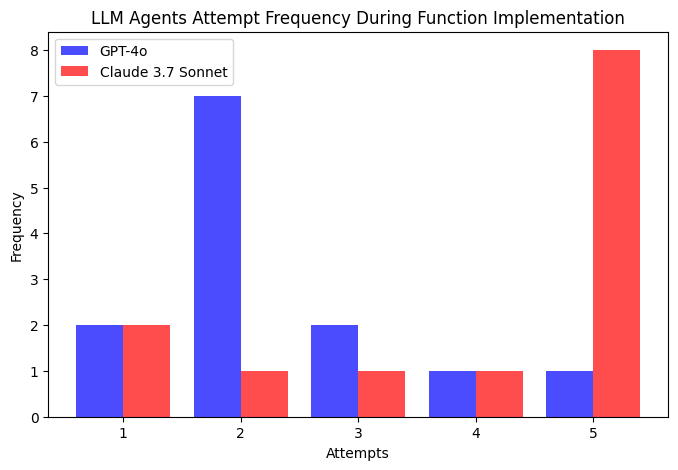

In [94]:
x = np.array(list(gpt_attempts.keys()))
y1 = list(gpt_attempts.values())
y2 = list(claude_attempts.values())

bar_width = 0.4

x1_positions = x - bar_width / 2
x2_positions = x + bar_width / 2

plt.figure(figsize=(8, 5))
plt.bar(x1_positions, y1, width=bar_width, color='blue', label='GPT-4o', alpha=0.7)
plt.bar(x2_positions, y2, width=bar_width, color='red', label='Claude 3.7 Sonnet', alpha=0.7)

plt.xlabel("Attempts")
plt.ylabel("Frequency")
plt.title("LLM Agents Attempt Frequency During Function Implementation")
plt.xticks(x)
plt.legend()

plt.show()

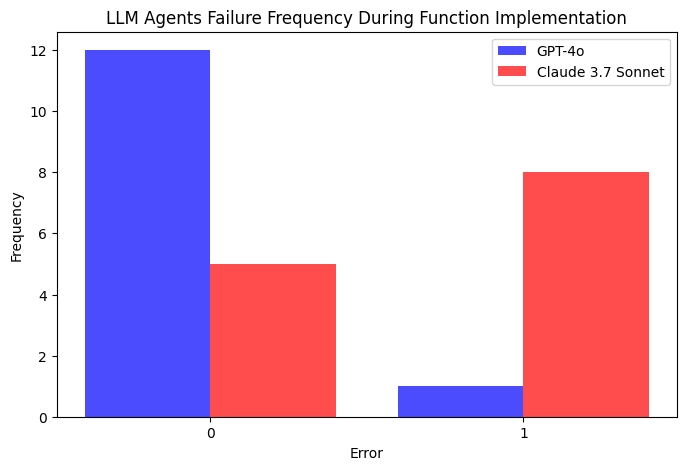

In [95]:
x = np.array(list(gpt_errors.keys()))
y1 = list(gpt_errors.values())
y2 = list(claude_errors.values())

bar_width = 0.4

x1_positions = x - bar_width / 2
x2_positions = x + bar_width / 2

plt.figure(figsize=(8, 5))
plt.bar(x1_positions, y1, width=bar_width, color='blue', label='GPT-4o', alpha=0.7)
plt.bar(x2_positions, y2, width=bar_width, color='red', label='Claude 3.7 Sonnet', alpha=0.7)

# Labels and title
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("LLM Agents Failure Frequency During Function Implementation")
plt.xticks(x)
plt.legend()

plt.show()

In [98]:
gpt_candidate = 0
claude_candidate = 0

In [99]:
for log in generation_logs[1:]:
    log_path = f'logs\\candidate\\{log}'
    with open(log_path, 'r') as log_file:
        lines = log_file.read()
        if lines == "GPT-4o":
            gpt_candidate = gpt_candidate + 1
        else:
            claude_candidate = claude_candidate + 1

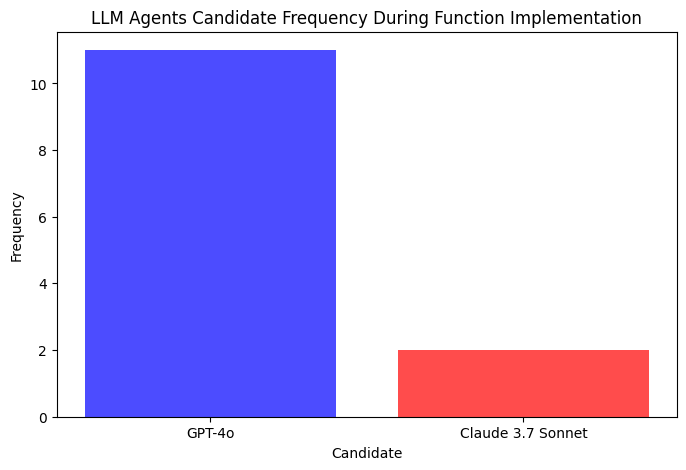

In [105]:
plt.figure(figsize=(8, 5))
plt.bar("GPT-4o", height=gpt_candidate, color='blue', alpha=0.7)
plt.bar("Claude 3.7 Sonnet", height=claude_candidate, color='red', alpha=0.7)

# Labels and title
plt.xlabel("Candidate")
plt.ylabel("Frequency")
plt.title("LLM Agents Candidate Frequency During Function Implementation")
plt.xticks(x)

plt.show()